In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import skimage
from matplotlib.colors import hsv_to_rgb
from matplotlib import animation
from IPython.display import display, HTML
from matplotlib.colors import hsv_to_rgb
from keras.models import Sequential, load_model
from keras.layers import Convolution2D
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense, Lambda
from keras.layers import ELU
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as KTF
from keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [8]:
models = glob.glob('output/*')

In [10]:
sorted(models)

['output/loss.png',
 'output/training.log',
 'output/weights-01-49.91.hdf5',
 'output/weights-02-49.15.hdf5',
 'output/weights-03-47.23.hdf5',
 'output/weights-04-47.16.hdf5',
 'output/weights-05-46.37.hdf5',
 'output/weights-06-46.39.hdf5',
 'output/weights-07-45.75.hdf5',
 'output/weights-08-46.00.hdf5',
 'output/weights-09-45.45.hdf5',
 'output/weights-10-45.15.hdf5',
 'output/weights-100-47.18.hdf5',
 'output/weights-101-46.96.hdf5',
 'output/weights-102-46.93.hdf5',
 'output/weights-103-46.90.hdf5',
 'output/weights-104-46.90.hdf5',
 'output/weights-105-46.90.hdf5',
 'output/weights-106-47.16.hdf5',
 'output/weights-107-46.74.hdf5',
 'output/weights-108-46.90.hdf5',
 'output/weights-109-46.53.hdf5',
 'output/weights-11-45.14.hdf5',
 'output/weights-110-46.99.hdf5',
 'output/weights-111-46.99.hdf5',
 'output/weights-112-47.27.hdf5',
 'output/weights-113-47.03.hdf5',
 'output/weights-114-46.90.hdf5',
 'output/weights-115-47.22.hdf5',
 'output/weights-116-47.10.hdf5',
 'output/weight

In [3]:
y = pd.read_csv('data/info.csv')
y = y.sample(frac=1, random_state=42).reset_index(drop=True)
X = []
print('Loading data...')
total = len(y)
for index, row in y.iterrows():
    try:
        img = cv2.imread(row['path'])
        X.append(img)
    except:
        y = y.drop(index)
y = y.drop('path', axis=1)

Loading data...


In [8]:
model = load_model('cnn_output/weights-999-48.80.hdf5')

In [4]:
model.predict(np.array(X[:5]))

array([[ 0.7191285 , -0.8927939 ,  1.6513413 ],
       [-0.1318147 , -0.51128525, -0.5439817 ],
       [-3.1342504 , 18.322683  , 13.531599  ],
       [11.781163  ,  9.033731  , 13.049953  ],
       [ 0.08897063, -0.03461418,  0.41218472]], dtype=float32)

In [5]:
y.head()

latitude  longitude  speed
0   0.007002   0.005085   2.22
1   0.015958   0.010671   0.00
2  -1.956253  16.824295  14.60
3  12.889961   9.565079  12.68
4   0.026377  -0.061924   0.00

In [ ]:
y = pd.read_csv('data/info.csv')
y = y.sample(frac=1, random_state=42).reset_index(drop=True)
X = []
print('Loading data...')
total = len(y)
for index, row in y.iterrows():
    print('{}/{}'.format(index, total))
    try:
        img = cv2.imread(row['path'])
        X.append(img)
    except:
        y = y.drop(index)
y = y.drop('path', axis=1)


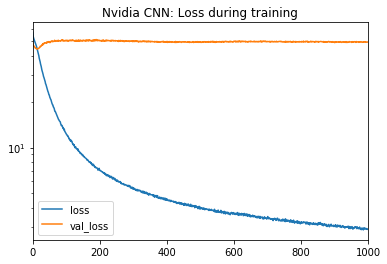

In [7]:
history = pd.read_csv('output/training.log')
history = history.drop(['epoch'], axis=1)
from keras.utils import plot_model
history.iloc[:1000].plot(logy=True)
plt.title('Nvidia CNN: Loss during training')
plt.show()

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
y = pd.read_csv('data/info.csv').drop('path', axis=1)
y.latitude /= 10000
y.latitude.hist(bins=50)
plt.title('Histogram of Latitude Change')
plt.ylabel('# of Samples')
plt.xlabel('Longitude change')
plt.show()

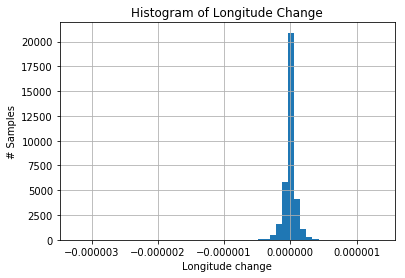

In [27]:
y.longitude /= 10000
y.longitude.hist(bins=50)
plt.title('Histogram of Longitude Change')
plt.ylabel('# of Samples')
plt.xlabel('Longitude change')
plt.show()

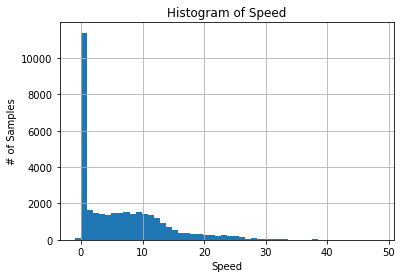

In [28]:
y.speed.hist(bins=50)
plt.title('Histogram of Speed')
plt.ylabel('# of Samples')
plt.xlabel('Speed')
plt.show()

In [18]:
def opticalFlowDense(image_current, image_next):
    """
    input: image_current, image_next (RGB images)
    calculates optical flow magnitude and angle and places it into HSV image
    * Set the saturation to the saturation value of image_next
    * Set the hue to the angles returned from computing the flow params
    * set the value to the magnitude returned from computing the flow params
    * Convert from HSV to RGB and return RGB image with same size as original image
    """
    hsv = np.zeros_like(image_current)
    hsv[...,1] = 255
    curr = cv2.cvtColor(image_current,cv2.COLOR_BGR2GRAY)
    nex = cv2.cvtColor(image_next,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(curr,nex, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    return rgb
def plot_movie(image_array):
    dpi = 72.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    anim.save('actual.mp4')
    display(HTML(anim.to_html5_video()))

In [4]:
path = sorted(glob.glob('data/videos/*'))

In [5]:
vid = cv2.VideoCapture(path[0])
frames = []
success, frame = vid.read()
while success:
    frame = np.rot90(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB),axes=(1,0))
    frames.append(frame)
    for i in range(10):
        success, frame = vid.read()

In [35]:
plot_movie(frames[:59])

<Figure size 1280x720 with 0 Axes>

In [27]:
vid = cv2.VideoCapture(path[0])

flowframes = []
success, frame = vid.read()
while success:
    timestamp = vid.get(cv2.CAP_PROP_POS_MSEC)
    frame = np.rot90(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB),axes=(1,0))
    vid.set(cv2.CAP_PROP_POS_MSEC, timestamp + 100)
    success, nextframe = vid.read()
    if success:
        nextframe = np.rot90(cv2.cvtColor(nextframe,cv2.COLOR_BGR2RGB),axes=(1,0))
    vid.set(cv2.CAP_PROP_POS_MSEC, timestamp)
    if success:
        flowframes.append(opticalFlowDense(frame, nextframe))
    for i in range(10):
        success, frame = vid.read()

In [21]:
plt.imsave('flow.jpg',opticalFlowDense(frames[-2], frames[-1]))

In [31]:
plot_movie(flowframes, 'flow.mp4')

<Figure size 1280x720 with 0 Axes>